
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




Solve the right problem, but didn’t realize it had already been solved or can’t reproduce it: 

When I was working in my previous organization as a Business Technology Analyst, I was assigned a project to create data quality management (DQM) frameworks to automate data loading and quality check processing for a client. The task had earlier been taken up by another consultant but could not be completed due to time constraints. However, when I was onboarded on the task I had to start the task from scratch. There was no proper documentation of the steps taken earlier to reproduce the code/framework and the remaining steps to be performed. This resulted in me again working on the same task and encountering the same issues which might have been solved earlier. 

Another time I was working on designing a ETL process to fetch the data from the client's server and load it on our local software using Informatica tool. There was some issue in the file from the client side and I had to sit and find a workaround for it. I realized later that the same task had already been performed by another team earlier who had used the same file in one of their process. Due to lack of communication/proper documentation for the already resolved issue, this task unecessarily took up extra time and was not the most efficient way to work in.

# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


## Answer



<img src="Image 1.jpeg"> <img src="Image 2.jpeg"> <img src="Image 3.jpeg">

# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = population/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [2]:
X.shape

(20433, 8)

In [3]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## (b)

In [4]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print 'Intercept: \n' , regr.intercept_
print 'Coefficients: \n', regr.coef_

Intercept: 
-3585395.747892478
Coefficients: 
[-4.27301205e+04 -4.25097369e+04  1.15790031e+03 -8.24972507e+00
  1.13820707e+02 -3.83855780e+01  4.77013513e+01  4.02975217e+04]


In [5]:
pred = regr.predict(X)
pred

array([411270.20746021, 415943.95527543, 380534.16332107, ...,
        24989.18869283,  37961.51486098,  55555.76850637])

In [6]:
print'Mean Absolute Error:', mean_absolute_error(Y, pred)

Mean Absolute Error: 50799.6307289529


## (c)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

In [8]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)
print 'Intercept: \n', regressor.intercept_
print 'Coefficients: \n', regressor.coef_

Intercept: 
-3620819.2191376095
Coefficients: 
[-4.32286140e+04 -4.31271391e+04  1.10248793e+03 -8.21710211e+00
  1.10718936e+02 -4.28091235e+01  6.30396069e+01  4.02477126e+04]


In [9]:
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)

In [10]:
print'Mean Absolute Error on test set:', mean_absolute_error(Y_test, Y_pred_test)

Mean Absolute Error on test set: 50916.74299435109


In [11]:
print'Mean Absolute Error on training set:', mean_absolute_error(Y_train, Y_pred_train)

Mean Absolute Error on training set: 50749.10314465295


The mean absolute error obtained from the training set is little less than the mean absolute error obtained from the test set which is expected as we have trained the model on the training set

## (d)

In [12]:
X_train.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000


Independent variables having correlation greater than 0.9 w.r.t 'households': 
total_rooms, total_bedrooms and population 


## (e)

In [13]:
X_train['average_bedrooms '] = X_train['total_bedrooms']/X_train['households']
X_train['average_rooms'] = X_train['total_rooms']/X_train['households']
X_train['average_population'] = X_train['population']/X_train['households']

In [14]:
X_test['average_bedrooms '] = X_test['total_bedrooms']/X_test['households']
X_test['average_rooms'] = X_test['total_rooms']/X_test['households']
X_test['average_population'] = X_test['population']/X_test['households']

In [15]:
X_train.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_population
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
average_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
average_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


Observation: 

Average bedrooms and average rooms are highly correlated with each other. All the new variables have a weak negative correlation with the variable households.

## (f)

In [16]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)
print 'Intercept: \n', regressor.intercept_
print 'Coefficients: \n', regressor.coef_

Intercept: 
-3595887.526054848
Coefficients: 
[-4.27417484e+04 -4.25742527e+04  1.08517832e+03 -3.57548947e+00
  6.40088002e+01 -4.51448270e+01  9.46568577e+01  4.19884813e+04
  3.38371024e+04 -5.62250978e+03  3.94309532e+02]


In [17]:
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)

In [18]:
print'Mean Absolute Error on test set:', mean_absolute_error(Y_test, Y_pred_test)

Mean Absolute Error on test set: 50783.974603927876


In [19]:
print'Mean Absolute Error on training set:', mean_absolute_error(Y_train, Y_pred_train)

Mean Absolute Error on training set: 50474.268791457886


We can observe that the mean absolute error for both the training and test sets has reduced after the addition of new variables 

# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [20]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_population
2735,-115.50,32.67,35.0,2159.0,492.0,1694.0,475.0,2.1776,1.035789,4.545263,3.566316
8218,-118.12,33.76,45.0,3035.0,516.0,1127.0,527.0,7.0796,0.979127,5.759013,2.138520
6059,-117.90,34.11,23.0,4776.0,1316.0,4797.0,1187.0,2.1667,1.108677,4.023589,4.041281
17828,-121.98,37.28,26.0,1182.0,309.0,620.0,306.0,3.3922,1.009804,3.862745,2.026144
12456,-121.43,38.53,36.0,1488.0,294.0,846.0,279.0,3.1208,1.053763,5.333333,3.032258


In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
scaled_X_test = preprocessing.scale(X_test)
scaled_X_train = preprocessing.scale(X_train)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [23]:
import numpy as np
alphas =  10**np.linspace(10,-2,100)*0.5

In [24]:
#Lasso
lasso = Lasso(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

lasso_clf = GridSearchCV(lasso, tuned_parameters,scoring = 'neg_mean_absolute_error', cv=n_folds, refit=False)
lasso_clf.fit(scaled_X_train,Y_train)
lasso_clf.best_params_
print 'Best chosen λ value for Lasso is', lasso_clf.best_params_['alpha']

Best chosen λ value for Lasso is 0.005


In [25]:
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

ridge_clf = GridSearchCV(ridge, tuned_parameters,scoring = 'neg_mean_absolute_error', cv=n_folds, refit=False)
ridge_clf.fit(scaled_X_train,Y_train)
ridge_clf.best_params_
print 'Best chosen λ value for Ridge is', ridge_clf.best_params_['alpha']

Best chosen λ value for Ridge is 37.823166377731454


## 2

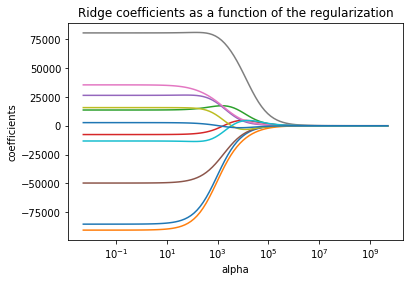

In [26]:
#Plotting ridge coefficents as a function of the regularization
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(scaled_X_train, Y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

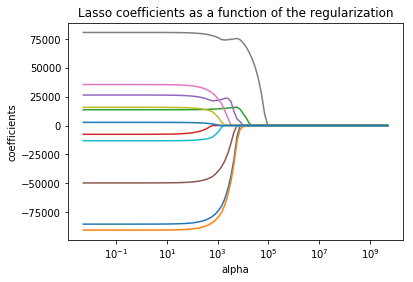

In [27]:
#Plotting lasso coefficents as a function of the regularization
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(scaled_X_train, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

We can observe that when the regularization parameter is increased, the value of the coefficients start converging towards zero which is what ridge and lasso intend to do. The difference between Ridge and Lasso is that lasso actually sets few coefficients equal to zero wheras ridge just minimizes the impact of irrelevant features but does not actually set them to exactly zero.

## 3

In [28]:
#Least squares Regression
least_squares = linear_model.LinearRegression()
least_squares.fit(scaled_X_train, Y_train)
Y_pred_test = least_squares.predict(scaled_X_test)
print'Mean Absolute Error for least squares regression:', mean_absolute_error(Y_test, Y_pred_test)

Mean Absolute Error for least squares regression: 50682.397574551534


In [29]:
#Lasso Regression
lasso_regression = linear_model.Lasso(alpha = lasso_clf.best_params_['alpha'])
lasso_regression.fit(scaled_X_train, Y_train)
Y_pred_test = lasso_regression.predict(scaled_X_test)
print'Mean Absolute Error for lasso regression:', mean_absolute_error(Y_test, Y_pred_test)

Mean Absolute Error for lasso regression: 50682.39724675481


In [30]:
#Ridge Regression
ridge_regression = linear_model.Lasso(alpha = ridge_clf.best_params_['alpha'])
ridge_regression.fit(scaled_X_train, Y_train)
Y_pred_test = ridge_regression.predict(scaled_X_test)
print'Mean Absolute Error for ridge regression:', mean_absolute_error(Y_test, Y_pred_test)

Mean Absolute Error for ridge regression: 50680.445656439995


## 4

In [31]:
#Fitting LassoCV
lasso_cv = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(scaled_X_train,Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [32]:
#Print the alpha parameter obtained above
print 'Best chosen 𝜆 value is:', lasso_cv.alpha_

Best chosen 𝜆 value is: 161.80167643776653


In [33]:
#Fit lasso using the above alpha and report MAE on Test.
lasso_cv = linear_model.Lasso(alpha = lasso_cv.alpha_)
lasso_cv.fit(scaled_X_train,Y_train)
coef = lasso_cv.coef_
print 'Coefficients: ', coef
Y_pred_test = lasso_cv.predict(scaled_X_test)
print 'Mean absolute error on training set: ', mean_absolute_error(Y_test, Y_pred_test)

Coefficients:  [-83729.40788737 -88966.60778197  13793.24655891  -5441.52359581
  24891.29887821 -48359.51663192  33593.70067617  79916.03828368
  14815.92067716 -12517.52849661   2360.88791625]
Mean absolute error on training set:  50681.95000148011


## 5

## Answer


We have to scale the independent variables before regularization so that the effect of regularization affects all the variables equally. If all the variables have different mean and standard deviation, then regularizing all the variables with the same penalty term will affect all the coefficients unequally. The different X variables like housing_median_age, total_rooms and population have different units and fitting them in regression without scaling will produce very different estimations of β coefficients. Regularizing them with the same regularization term will penalize the different coefficients unequally. Therefore it is necessary to standardize the data before regularization.

# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

## Answer


As the number of instances for training is increased, the model is able to generalise better which is indicated by improvement in performance on the test data. The performance on the train data may improve or deteriorate depending upon the percentage of noise in the data. On the other hand, the decrease in the size of the training data causes the model to overfit.